Estimating the CME lateral expansion speed

In [15]:
import warnings
warnings.filterwarnings('ignore')
import sunpy
import logging
sunpy.log.setLevel(logging.WARNING) # Set SunPy's logger to only show WARNING or above
import os
import glob
import numpy as np
import pandas as pd
from datetime import datetime
import sunpy
from sunpy.map import Map
from sunpy.coordinates import sun
from sunpy.coordinates import frames
from sunpy.sun import constants as const
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.dates import DateFormatter
import astropy.units as u
import astropy.io.fits as fits
import astropy.constants as astro_const
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, LogStretch, PercentileInterval

# Construct the full path to the scripts directory
script_path = os.path.abspath('./scripts')

# Add the scripts directory to sys.path
import sys
if script_path not in sys.path:
    sys.path.append(script_path)

import fwdtools as fwd
import solar_data_utils as myfuncs
# Reload to update with new changes
import importlib
importlib.reload(fwd)
importlib.reload(myfuncs)

# set the directory path where the data is importe/stored
data_dir = '/home/mnedal/data'

In [2]:
suvi_map_objects  = myfuncs.load_suvi(data_dir=data_dir, start='2024-05-14T17:00:00', end='2024-05-14T18:00:00', channel=195)
clean_suvi_maps   = myfuncs.remove_redundant_maps(suvi_map_objects) # remove redundant images
suvi_seq_runratio = myfuncs.apply_runratio(clean_suvi_maps) # make running ratio maps

for m in suvi_seq_runratio:
    m.plot_settings['norm'] = colors.Normalize(vmin=0.7, vmax=1.3)

SUVI image 0 is done
SUVI image 1 is done
SUVI image 2 is done
SUVI image 3 is done
SUVI image 4 is done
SUVI image 5 is done
SUVI image 6 is done
SUVI image 7 is done
SUVI image 8 is done
SUVI image 9 is done
SUVI image 10 is done
SUVI image 11 is done
SUVI image 12 is done
SUVI image 13 is done
SUVI image 14 is done
SUVI image 15 is done
SUVI image 16 is done
SUVI image 17 is done
SUVI image 18 is done
SUVI image 19 is done
SUVI image 20 is done
SUVI image 21 is done


In [3]:
lasco_c2_map_objects = myfuncs.load_lasco(data_dir=data_dir, start='2024-05-14T17:30:00', end='2024-05-14T20:00:00', detector='C2')
clean_maps_c2        = myfuncs.remove_redundant_maps(lasco_c2_map_objects) # remove redundant images
m_seq_runratio_c2    = myfuncs.apply_runratio(clean_maps_c2) # make running ratio maps

print(f'Before:\nLASCO C2: {len(lasco_c2_map_objects)} images\n')
print(f'After:\nLASCO C2: {len(clean_maps_c2)} images')

LASCO C2 image 0 is done
LASCO C2 image 1 is done
LASCO C2 image 2 is done
LASCO C2 image 3 is done
LASCO C2 image 4 is done
LASCO C2 image 5 is done
LASCO C2 image 6 is done
LASCO C2 image 7 is done
LASCO C2 image 8 is done
LASCO C2 image 9 is done
LASCO C2 image 10 is done
LASCO C2 image 11 is done
LASCO C2 image 12 is done
LASCO C2 image 13 is done
LASCO C2 image 14 is done
LASCO C2 image 15 is done
LASCO C2 image 16 is done
LASCO C2 image 17 is done
LASCO C2 image 18 is done
LASCO C2 image 19 is done
LASCO C2 image 20 is done
LASCO C2 image 21 is done
LASCO C2 image 22 is done
LASCO C2 image 23 is done
LASCO C2 image 24 is done
LASCO C2 image 25 is done
LASCO C2 image 26 is done
LASCO C2 image 27 is done
LASCO C2 image 28 is done
LASCO C2 image 29 is done
LASCO C2 image 30 is done
LASCO C2 image 31 is done
LASCO C2 image 32 is done
LASCO C2 image 33 is done
LASCO C2 image 34 is done
LASCO C2 image 35 is done
LASCO C2 image 36 is done
LASCO C2 image 37 is done
LASCO C2 image 38 is d

2025-05-28 22:49:15 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-05-28 22:49:19 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


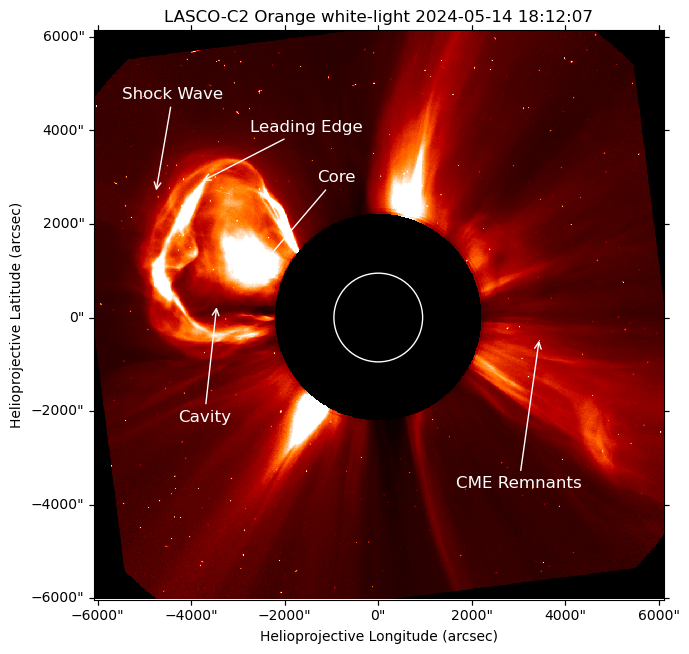

In [4]:
# Test ...
m = clean_maps_c2[4]

fig = plt.figure(figsize=[7,7], layout='constrained')
ax = fig.add_subplot(projection=m)
img = m.plot(axes=ax)
m.draw_limb()
ax.grid(False)
ax.set_xlabel('Helioprojective Longitude (arcsec)')
ax.set_ylabel('Helioprojective Latitude (arcsec)')

ax.annotate('Core', xy=(300, 600), xytext=(400, 750),
            # arrowprops=dict(facecolor='white', shrink=0.05),
            arrowprops=dict(arrowstyle='->', color='white', lw=1),
            color='white', fontsize=12)

ax.annotate('Cavity', xy=(220, 530), xytext=(150, 320),
            # arrowprops=dict(facecolor='white', shrink=0.05),
            arrowprops=dict(arrowstyle='->', color='white', lw=1),
            color='white', fontsize=12)

ax.annotate('Leading Edge', xy=(190, 750), xytext=(280, 840),
            # arrowprops=dict(facecolor='white', shrink=0.05),
            arrowprops=dict(arrowstyle='->', color='white', lw=1),
            color='white', fontsize=12)

ax.annotate('Shock Wave', xy=(110, 730), xytext=(50, 900),
            # arrowprops=dict(facecolor='white', shrink=0.05),
            arrowprops=dict(arrowstyle='->', color='white', lw=1),
            color='white', fontsize=12)

ax.annotate('CME Remnants', xy=(800, 470), xytext=(650, 200),
            # arrowprops=dict(facecolor='white', shrink=0.05),
            arrowprops=dict(arrowstyle='->', color='white', lw=1),
            color='white', fontsize=12)

fig.tight_layout()
# fig.savefig(f'{data_dir}/c2_whitelight.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [5]:
lasco_c3_map_objects = myfuncs.load_lasco(data_dir=data_dir, start='2024-05-14T17:45:00', end='2024-05-14T23:59:59', detector='C3')
clean_maps_c3        = myfuncs.remove_redundant_maps(lasco_c3_map_objects) # remove redundant images
m_seq_runratio_c3    = myfuncs.apply_runratio(clean_maps_c3, vmin=0.6, vmax=1.4) # make running ratio maps

print(f'Before:\nLASCO C3: {len(lasco_c3_map_objects)} images\n')
print(f'After:\nLASCO C3: {len(clean_maps_c3)} images')

LASCO C3 image 0 is done
LASCO C3 image 1 is done
LASCO C3 image 2 is done
LASCO C3 image 3 is done
LASCO C3 image 4 is done
LASCO C3 image 5 is done
LASCO C3 image 6 is done
LASCO C3 image 7 is done
LASCO C3 image 8 is done
LASCO C3 image 9 is done
LASCO C3 image 10 is done
LASCO C3 image 11 is done
LASCO C3 image 12 is done
LASCO C3 image 13 is done
LASCO C3 image 14 is done
LASCO C3 image 15 is done
LASCO C3 image 16 is done
LASCO C3 image 17 is done
LASCO C3 image 18 is done
LASCO C3 image 19 is done
LASCO C3 image 20 is done
LASCO C3 image 21 is done
LASCO C3 image 22 is done
LASCO C3 image 23 is done
LASCO C3 image 24 is done
LASCO C3 image 25 is done
LASCO C3 image 26 is done
LASCO C3 image 27 is done
LASCO C3 image 28 is done
LASCO C3 image 29 is done
LASCO C3 image 30 is done
LASCO C3 image 31 is done
LASCO C3 image 32 is done
LASCO C3 image 33 is done
LASCO C3 image 34 is done
LASCO C3 image 35 is done
LASCO C3 image 36 is done
LASCO C3 image 37 is done
LASCO C3 image 38 is d

2025-05-28 22:50:38 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:38 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-05-28 22:50:39 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:39 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:39 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-05-28 22:50:39 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:39 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:39 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-05-28 22:50:40 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:40 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-05-28 22:50:40 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:40 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-05-28 22:50:40 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:40 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-05-28 22:50:41 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:41 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-05-28 22:50:41 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:41 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-05-28 22:50:42 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:42 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-05-28 22:50:42 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


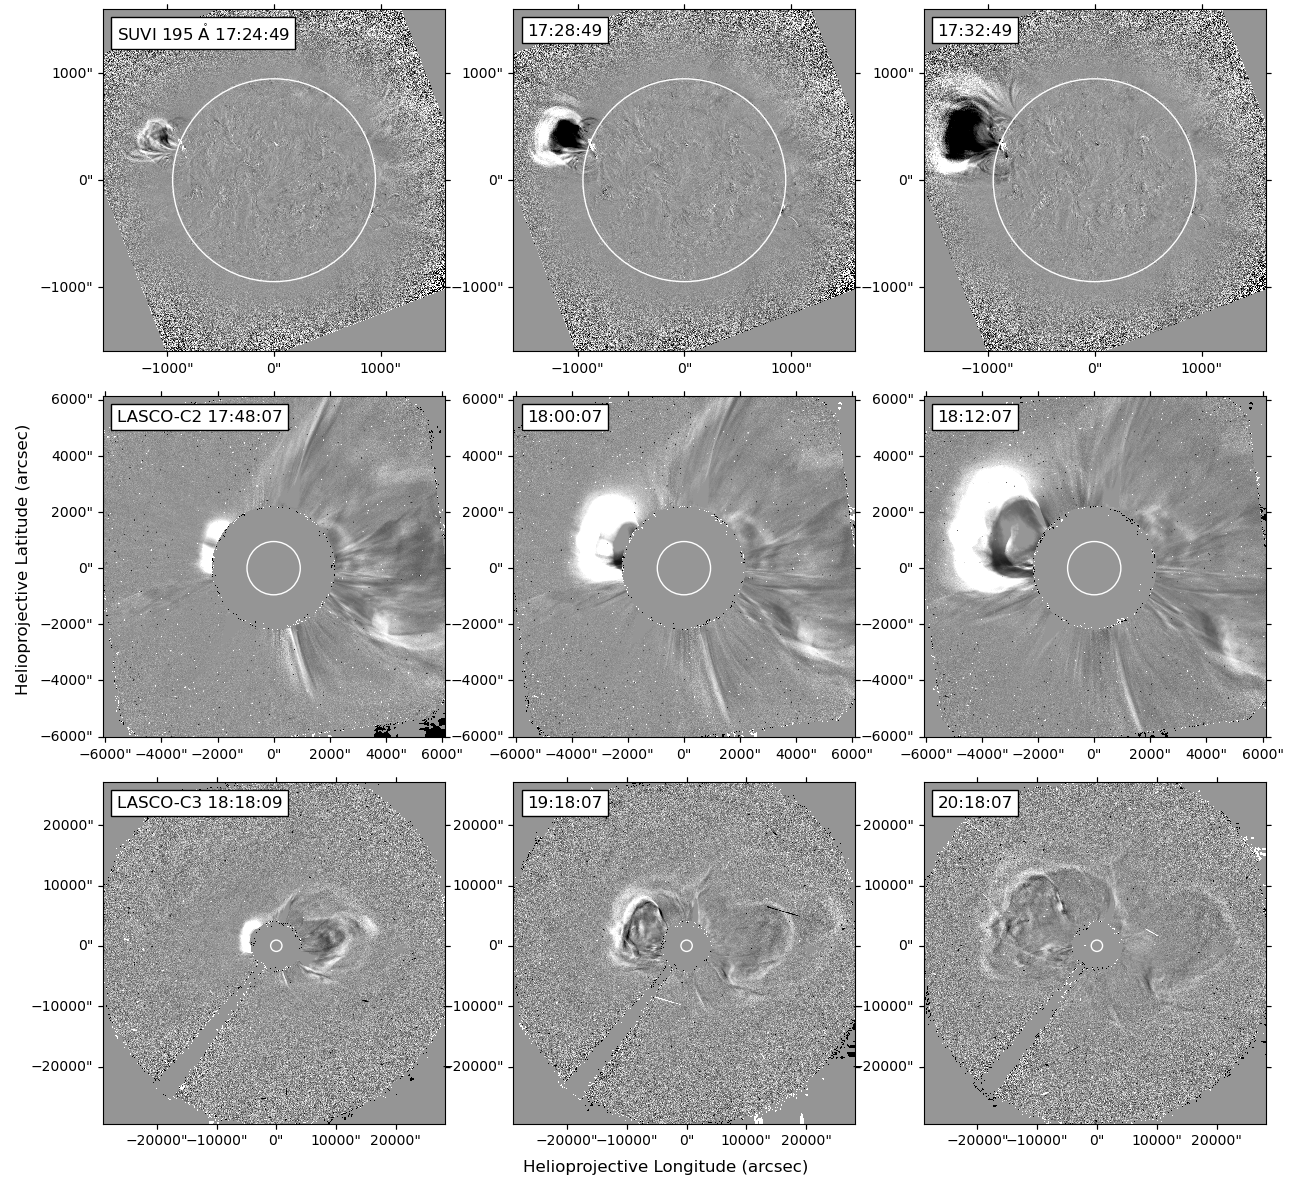

In [6]:
subset = [ suvi_seq_runratio[5], suvi_seq_runratio[6], suvi_seq_runratio[7], 
          m_seq_runratio_c2[1], m_seq_runratio_c2[2], m_seq_runratio_c2[3], 
          m_seq_runratio_c3[2], m_seq_runratio_c3[7], m_seq_runratio_c3[12] ]

fig = plt.figure(figsize=[15,15])
fig.supxlabel('Helioprojective Longitude (arcsec)', y=0.09)
fig.supylabel('Helioprojective Latitude (arcsec)', x=0.067)

for i, m in enumerate(subset):
    ax = fig.add_subplot(3, 3, i+1, projection=m)
    m.plot(axes=ax)
    m.draw_limb()
    ax.grid(False)
    ax.set_title('')
    
    if i==0:
        label = m.latex_name.split(' 2024')[0] + ' ' + m.latex_name.split('2024-05-14 ')[-1]
    elif i==1 or i==2:
        label = m.latex_name.split('2024-05-14 ')[-1]
    elif i==3:
        label = m.latex_name.split(' Orange')[0] + ' ' + m.latex_name.split('2024-05-14 ')[-1]
    elif i==4 or i==5:
        label = m.latex_name.split('2024-05-14 ')[-1]
    elif i==6:
        label = m.latex_name.split(' Clear')[0] + ' ' + m.latex_name.split('2024-05-14 ')[-1]
    elif i==7 or i==8:
        label = m.latex_name.split('2024-05-14 ')[-1]
    
    ax.text(0.04, 0.96, label, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    ax.set_xlabel(' ')
    ax.set_ylabel(' ')
fig.subplots_adjust(wspace=0.2, hspace=0.01)  # Reduce whitespace
# fig.savefig(f'{data_dir}/euv_runratio_panels.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Est. the CME expansion speed

---

---

In [ ]:
dates_suvi, distances_suvi, angular_widths_suvi = [], [], []
dates_c2, distances_c2, angular_widths_c2       = [], [], []
dates_c3, distances_c3, angular_widths_c3       = [], [], []

2025-05-28 22:50:45 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-05-28 22:50:45 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


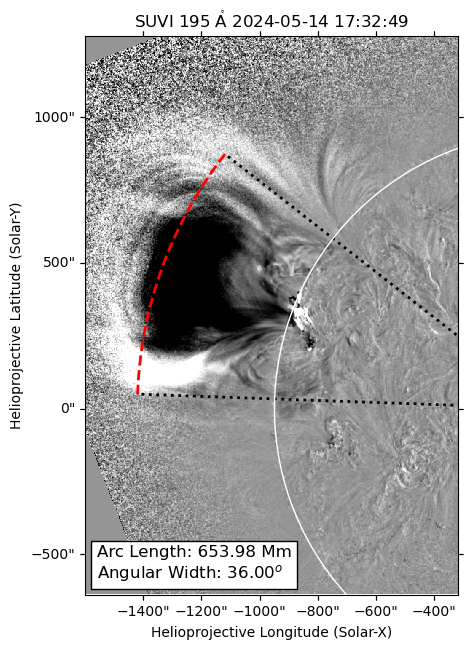

In [7]:
# Define parameters
offset = 350
central_angle = 160

angle_offset = 18           # Half of the total angular width
central_line_length = 1070  # Black line length
m = suvi_seq_runratio[7]


fig = plt.figure(figsize=[8,10])
ax  = fig.add_subplot(projection=m)
m.plot(axes=ax)
m.draw_limb()
ax.grid(False)

# Get line endpoints
_, upper_end   = myfuncs.plot_line(angle_deg=central_angle - angle_offset, length=central_line_length+offset, map_obj=m)
_, central_end = myfuncs.plot_line(angle_deg=central_angle, length=central_line_length, map_obj=m)
_, lower_end   = myfuncs.plot_line(angle_deg=central_angle + angle_offset, length=central_line_length+offset, map_obj=m)

# Use the black line length as the radius of the arc
radius_arcsec = (central_line_length + offset)*u.arcsec  # Use same radius as the black lines

# Generate arc points centered at the Sun
arc_angles = np.linspace(central_angle-angle_offset, central_angle+angle_offset, 100)  # Smooth arc
arc_x = radius_arcsec * np.cos(np.deg2rad(arc_angles))
arc_y = radius_arcsec * np.sin(np.deg2rad(arc_angles))
arc_coords = SkyCoord(arc_x, arc_y, frame=m.coordinate_frame)

# Compute arc length in Mm
solar_radius_Mm = const.radius.to('Mm').value
rsun_arcsec = m.rsun_obs.value # Solar radius in arcseconds
arc_length_arcsec = radius_arcsec*np.deg2rad(angle_offset*2) # Arc length formula S = Rθ
arc_length_Mm = (arc_length_arcsec/rsun_arcsec).value * solar_radius_Mm # Convert to Mm

# Plot all elements
ax.plot_coord(arc_coords, color='red', linewidth=2, linestyle='dashed') # Correct arc along black lines
ax.plot_coord(SkyCoord([SkyCoord(0*u.arcsec, 0*u.arcsec, frame=m.coordinate_frame), upper_end]), color='black', linewidth=2, linestyle='dotted')
ax.plot_coord(SkyCoord([SkyCoord(0*u.arcsec, 0*u.arcsec, frame=m.coordinate_frame), lower_end]), color='black', linewidth=2, linestyle='dotted')

# Add text annotation
ax.text(0.03, 0.09, f'Arc Length: {arc_length_Mm:.2f} Mm\nAngular Width: {angle_offset*2:.2f}$^o$', transform=ax.transAxes,
        fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'), zorder=20)

# crop 60% from the right
ax.set_xlim(left=0, right=m.dimensions.x.value*0.4)
# crop 30% from bottom and 10% from top
ax.set_ylim(bottom=m.dimensions.y.value*0.3, top=m.dimensions.y.value-m.dimensions.y.value*0.1)
fig.tight_layout()
plt.show()

# dates_suvi.append(m.date)
# distances_suvi.append(arc_length_Mm)
# angular_widths_suvi.append(angle_offset*2)

# dates_c2.append(m.date)
# distances_c2.append(arc_length_Mm)
# angular_widths_c2.append(angle_offset*2)

# dates_c3.append(m.date)
# distances_c3.append(arc_length_Mm)
# angular_widths_c3.append(angle_offset*2)

## After finishing the 9 frames for all the 3 instruments

In [8]:
df_suvi = pd.DataFrame({'date': dates_suvi, 'length_Mm': distances_suvi, 'AW': angular_widths_suvi})
df_c2   = pd.DataFrame({'date': dates_c2, 'length_Mm': distances_c2, 'AW': angular_widths_c2})
df_c3   = pd.DataFrame({'date': dates_c3, 'length_Mm': distances_c3, 'AW': angular_widths_c3})

NameError: name 'dates_suvi' is not defined

In [ ]:
# Convert date column to datetime
df_suvi['date'] = pd.to_datetime(df_suvi['date'].apply(lambda t: t.iso))
df_c2['date']   = pd.to_datetime(df_c2['date'].apply(lambda t: t.iso))
df_c3['date']   = pd.to_datetime(df_c3['date'].apply(lambda t: t.iso))

In [9]:
def calc_speed(df):
    """
    Calculate the CME expansion speed in km/s.
    """
    speeds = []
    for i in range(1, len(df)):
        ds_Mm = (df.loc[i, 'length_Mm'] - df.loc[i - 1, 'length_Mm']) * u.Mm
        ds_km = ds_Mm.to('km').value  # Convert to km
        time_diff_sec = (df.loc[i, 'date'] - df.loc[i - 1, 'date']).total_seconds()
        vexp = ds_km / time_diff_sec
        speeds.append(vexp)
    return speeds

In [10]:
# Add expansion speed to the DataFrame (NaN for the first row)
expansion_speeds_suvi = calc_speed(df_suvi)
expansion_speeds_c2   = calc_speed(df_c2)
expansion_speeds_c3   = calc_speed(df_c3)

df_suvi['expansion_speed_km_s'] = [None] + expansion_speeds_suvi
df_c2['expansion_speed_km_s']   = [None] + expansion_speeds_c2
df_c3['expansion_speed_km_s']   = [None] + expansion_speeds_c3

NameError: name 'df_suvi' is not defined

NameError: name 'df_suvi' is not defined

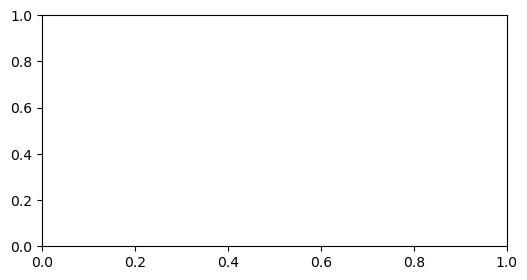

In [11]:
fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)

# Plot length in black
ax.plot(df_suvi['date'], df_suvi['length_Mm'], 'o-', color='k')
ax.plot(df_c2['date'], df_c2['length_Mm'], 'o-', color='k')
ax.plot(df_c3['date'], df_c3['length_Mm'], 'o-', color='k')
ax.set_ylabel('Length of triangle base (Mm)')
ax.set_xlabel('Time (HH:MM)')
ax.set_yscale('log')

# Make twin y-axis
ax2 = ax.twinx()
ax2.tick_params(axis='y', labelcolor='r')

# Plot AW in red dashed lines
ax2.plot(df_suvi['date'], df_suvi['AW'], 'o--', color='r')
ax2.plot(df_c2['date'], df_c2['AW'], 'o--', color='r')
ax2.plot(df_c3['date'], df_c3['AW'], 'o--', color='r')
ax2.set_ylabel(r'Angular width ($^o$)', color='r')

# Add vertical shading for each instrument
color_intensity = 0.35
ax.axvspan(df_suvi['date'].min(), df_suvi['date'].max(), color='#ADD8E6', alpha=color_intensity, label=rf'SUVI ($<v>$={np.nanmean(df_suvi["expansion_speed_km_s"]):.2f} km s$^{{-1}}$)')
ax.axvspan(df_c2['date'].min(), df_c2['date'].max(), color='#FFDAB9', alpha=color_intensity, label=rf'LASCO C2 ($<v>$={np.nanmean(df_c2["expansion_speed_km_s"]):.2f} km s$^{{-1}}$)')
ax.axvspan(df_c3['date'].min(), df_c3['date'].max(), color='#90EE90', alpha=color_intensity, label=rf'LASCO C3 ($<v>$={np.nanmean(df_c3["expansion_speed_km_s"]):.2f} km s$^{{-1}}$)')

ax.legend(loc='lower right')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig.tight_layout()
# fig.savefig(f'{data_dir}/cme_expansion_speed.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
# # Test ...
# ds_Mm = (3435.94 - 1928.23)*u.Mm
# ds_km = ds_Mm.to('km').value
# print(f'Distance difference: {ds_km:.2f} km')

# t1 = datetime.fromisoformat('2024-05-14T18:00:07.457')
# t2 = datetime.fromisoformat('2024-05-14T17:48:07.566')

# time_diff_sec = (t1 - t2).total_seconds()
# print(f'Time difference: {time_diff_sec:.2f} seconds')

# vexp = ds_km / time_diff_sec
# print(f'Expansion speed = {vexp:.2f} km/s')

In [12]:
def draw_triangle(map_obj=m, central_angle=160, upper_angle_shift=20, lower_angle_shift=18, central_line_length=1450):
    """
    Draws a triangular structure on a solar map by plotting three lines: a central line, an upper line, 
    and a lower line, each originating from a common starting point.

    Parameters:
    -----------
    map_obj : SunPy Map, optional
        The solar map object on which the triangle is drawn. Defaults to `m`.
    central_angle : float, optional
        The angle (in degrees) of the central line measured counterclockwise from the reference axis. 
        Defaults to 160 degrees.
    upper_angle_shift : float, optional
        The angular shift (in degrees) of the upper line relative to the central angle. Defaults to 20 degrees.
    lower_angle_shift : float, optional
        The angular shift (in degrees) of the lower line relative to the central angle. Defaults to 18 degrees.
    central_line_length : float, optional
        The length (in arcseconds) of the central line. Defaults to 1450 arcseconds.

    Returns:
    --------
    upper_end : SkyCoord
        The endpoint of the upper line in sky coordinates.
    lower_end : SkyCoord
        The endpoint of the lower line in sky coordinates.
    length_Mm : float
        The physical length of the connecting line between `upper_end` and `lower_end`, in megameters (Mm).
    theta_deg : float
        The angular width of the triangle (the angle between the upper and lower lines), in degrees.

    Notes:
    ------
    - The upper and lower lines extend beyond the central line by an additional 350 arcseconds.
    - The connecting line between the upper and lower endpoints is computed perpendicularly to the central line.
    - The function converts the connecting line's length from arcseconds to megameters based on the observed solar radius.

    """
    upper_angle = central_angle - upper_angle_shift
    lower_angle = central_angle + lower_angle_shift
    # Get the start and end points of each line
    _, upper_end   = myfuncs.plot_line(angle_deg=upper_angle, length=central_line_length+350, map_obj=m)
    _, central_end = myfuncs.plot_line(angle_deg=central_angle, length=central_line_length, map_obj=m)
    _, lower_end   = myfuncs.plot_line(angle_deg=lower_angle, length=central_line_length+350, map_obj=m)
    # Compute the connecting line (perpendicular to central line)
    connecting_line = SkyCoord([upper_end, lower_end])
    # Compute the length of the connecting line in arcseconds
    length_arcsec = np.sqrt((upper_end.Tx - lower_end.Tx)**2 + (upper_end.Ty - lower_end.Ty)**2)
    # Convert arcseconds to megameters
    solar_radius_Mm = const.radius.to('Mm').value
    rsun_arcsec = m.rsun_obs.value  # Solar radius in arcseconds
    length_Mm = (length_arcsec.value / rsun_arcsec) * solar_radius_Mm
    # Compute the angular width (triangle head angle)
    theta_deg = abs(upper_angle - lower_angle)
    return upper_end, lower_end, length_Mm, theta_deg

## Apply on a single map

2025-05-28 22:52:40 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-05-28 22:52:41 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


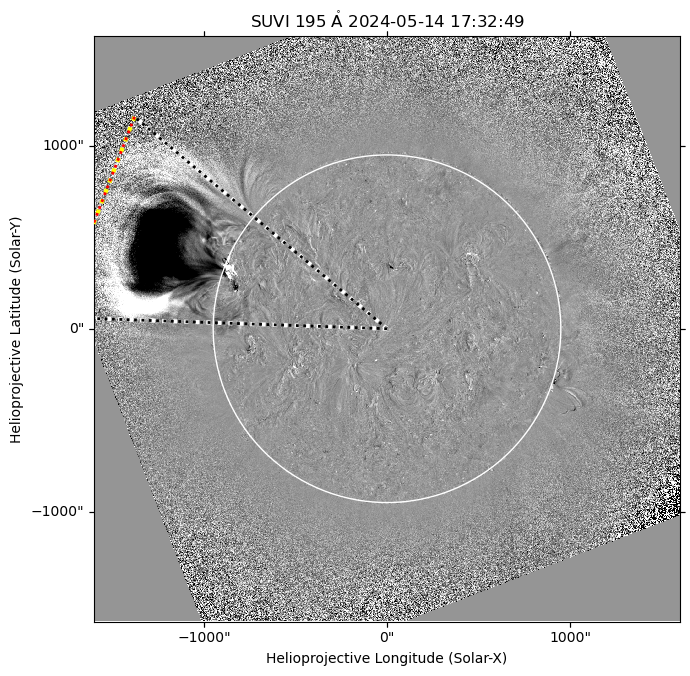

In [13]:
# Define the map and lines
m = suvi_seq_runratio[7]
upper_end, lower_end, length_Mm, theta_deg = draw_triangle(map_obj=m,
                                                           central_angle=160,
                                                           upper_angle_shift=20,
                                                           lower_angle_shift=18,
                                                           central_line_length=1450)


fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=m)
m.plot(axes=ax)
m.draw_limb()
ax.grid(False)

# Plot all lines
outline_wdith = 3
ax.plot_coord(SkyCoord([upper_end, lower_end]), color='yellow', linewidth=outline_wdith, linestyle=':')  # Outline (thicker)
ax.plot_coord(SkyCoord([upper_end, lower_end]), color='r', linewidth=2, linestyle=':')  # Connecting red (Main) line

ax.plot_coord(SkyCoord([SkyCoord(0*u.arcsec, 0*u.arcsec, frame=m.coordinate_frame), upper_end]), color='w', linewidth=outline_wdith, linestyle=':') # Outline (thicker)
ax.plot_coord(SkyCoord([SkyCoord(0*u.arcsec, 0*u.arcsec, frame=m.coordinate_frame), upper_end]), color='k', linewidth=2, linestyle=':') # Main line

ax.plot_coord(SkyCoord([SkyCoord(0*u.arcsec, 0*u.arcsec, frame=m.coordinate_frame), lower_end]), color='w', linewidth=outline_wdith, linestyle=':') # Outline (thicker)
ax.plot_coord(SkyCoord([SkyCoord(0*u.arcsec, 0*u.arcsec, frame=m.coordinate_frame), lower_end]), color='k', linewidth=2, linestyle=':')  # Main line

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.tight_layout()
plt.show()

## Apply on several maps

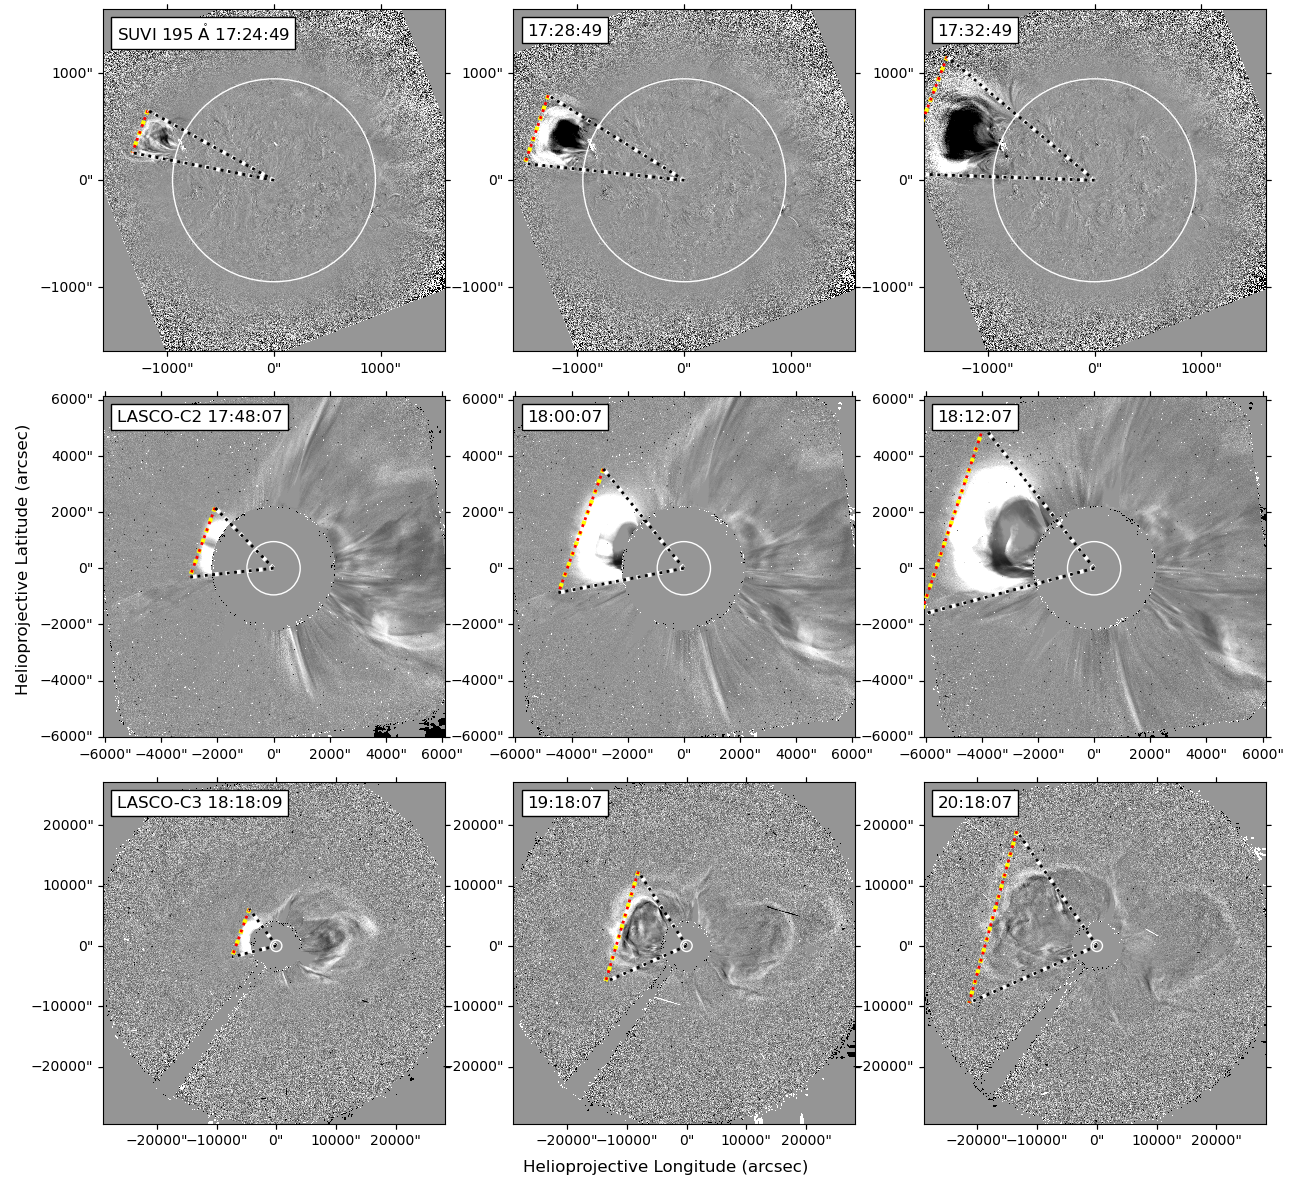

In [16]:
map_params = {
    suvi_seq_runratio[5]: {'central_angle': 160, 'upper_angle_shift': 9, 'lower_angle_shift': 9, 'central_line_length': 1000},
    suvi_seq_runratio[6]: {'central_angle': 160, 'upper_angle_shift': 12, 'lower_angle_shift': 14, 'central_line_length': 1150},
    suvi_seq_runratio[7]: {'central_angle': 160, 'upper_angle_shift': 20, 'lower_angle_shift': 18, 'central_line_length': 1450},
    
    m_seq_runratio_c2[1]: {'central_angle': 160, 'upper_angle_shift': 26, 'lower_angle_shift': 26, 'central_line_length': 2650},
    m_seq_runratio_c2[2]: {'central_angle': 160, 'upper_angle_shift': 31, 'lower_angle_shift': 31, 'central_line_length': 4200},
    m_seq_runratio_c2[3]: {'central_angle': 160, 'upper_angle_shift': 32, 'lower_angle_shift': 35, 'central_line_length': 6050},
    
    m_seq_runratio_c3[2]: {'central_angle': 160, 'upper_angle_shift': 34, 'lower_angle_shift': 34, 'central_line_length': 7300},
    m_seq_runratio_c3[7]: {'central_angle': 160, 'upper_angle_shift': 37, 'lower_angle_shift': 44, 'central_line_length': 14500},
    m_seq_runratio_c3[12]: {'central_angle': 160, 'upper_angle_shift': 35, 'lower_angle_shift': 44, 'central_line_length': 23000},
}


fig = plt.figure(figsize=[15,15])
fig.supxlabel('Helioprojective Longitude (arcsec)', y=0.09)
fig.supylabel('Helioprojective Latitude (arcsec)', x=0.067)

for i, m in enumerate(subset):
    params = map_params[m]
    upper_end, lower_end, length_Mm, theta_deg = draw_triangle(map_obj=m,
                                                               central_angle=params['central_angle'],
                                                               upper_angle_shift=params['upper_angle_shift'],
                                                               lower_angle_shift=params['lower_angle_shift'],
                                                               central_line_length=params['central_line_length']
                                                              )
    
    ax = fig.add_subplot(3, 3, i+1, projection=m)
    m.plot(axes=ax)
    m.draw_limb()
    ax.grid(False)
    
    if i==0:
        label = m.latex_name.split(' 2024')[0] + ' ' + m.latex_name.split('2024-05-14 ')[-1]
    elif i==1 or i==2:
        label = m.latex_name.split('2024-05-14 ')[-1]
    elif i==3:
        label = m.latex_name.split(' Orange')[0] + ' ' + m.latex_name.split('2024-05-14 ')[-1]
    elif i==4 or i==5:
        label = m.latex_name.split('2024-05-14 ')[-1]
    elif i==6:
        label = m.latex_name.split(' Clear')[0] + ' ' + m.latex_name.split('2024-05-14 ')[-1]
    elif i==7 or i==8:
        label = m.latex_name.split('2024-05-14 ')[-1]
    ax.text(0.04, 0.96, label, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    
    # Plot all lines
    outline_wdith = 3
    ax.plot_coord(SkyCoord([upper_end, lower_end]), color='yellow', linewidth=outline_wdith, linestyle=':')  # Outline (thicker)
    ax.plot_coord(SkyCoord([upper_end, lower_end]), color='r', linewidth=2, linestyle=':')  # Connecting red (Main) line
    
    ax.plot_coord(SkyCoord([SkyCoord(0*u.arcsec, 0*u.arcsec, frame=m.coordinate_frame), upper_end]), color='w', linewidth=outline_wdith, linestyle=':') # Outline (thicker)
    ax.plot_coord(SkyCoord([SkyCoord(0*u.arcsec, 0*u.arcsec, frame=m.coordinate_frame), upper_end]), color='k', linewidth=2, linestyle=':') # Main line
    
    ax.plot_coord(SkyCoord([SkyCoord(0*u.arcsec, 0*u.arcsec, frame=m.coordinate_frame), lower_end]), color='w', linewidth=outline_wdith, linestyle=':') # Outline (thicker)
    ax.plot_coord(SkyCoord([SkyCoord(0*u.arcsec, 0*u.arcsec, frame=m.coordinate_frame), lower_end]), color='k', linewidth=2, linestyle=':')  # Main line
    
    ax.set_title('')
    ax.set_xlabel(' ')
    ax.set_ylabel(' ')
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)

fig.subplots_adjust(wspace=0.2, hspace=0.01)  # Reduce whitespace
# fig.savefig(f'{data_dir}/euv_runratio_panels.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Switch to the arc

In [108]:
def draw_arc(map_obj, angle_offset, central_line_length):
    """
    Draws an arc and two radial lines on the given map.
    Returns arc coordinates, endpoints of the two radial lines, arc length in Mm, and angular width in degrees.
    """
    radius_arcsec = (central_line_length + offset) * u.arcsec
    arc_angles = np.linspace(central_angle - angle_offset, central_angle + angle_offset, 100)

    arc_x = radius_arcsec * np.cos(np.deg2rad(arc_angles))
    arc_y = radius_arcsec * np.sin(np.deg2rad(arc_angles))
    arc_coords = SkyCoord(arc_x, arc_y, frame=map_obj.coordinate_frame)

    # Endpoints of radial lines
    _, upper_end = myfuncs.plot_line(angle_deg=central_angle - angle_offset,
                                     length=central_line_length + offset, map_obj=map_obj)
    _, lower_end = myfuncs.plot_line(angle_deg=central_angle + angle_offset,
                                     length=central_line_length + offset, map_obj=map_obj)

    # Compute arc length in Mm
    solar_radius_Mm = const.R_sun.to('Mm').value
    rsun_arcsec = map_obj.rsun_obs.value
    arc_length_arcsec = radius_arcsec * np.deg2rad(angle_offset * 2)
    arc_length_Mm = (arc_length_arcsec / rsun_arcsec).value * solar_radius_Mm

    return arc_coords, upper_end, lower_end, arc_length_Mm, angle_offset * 2

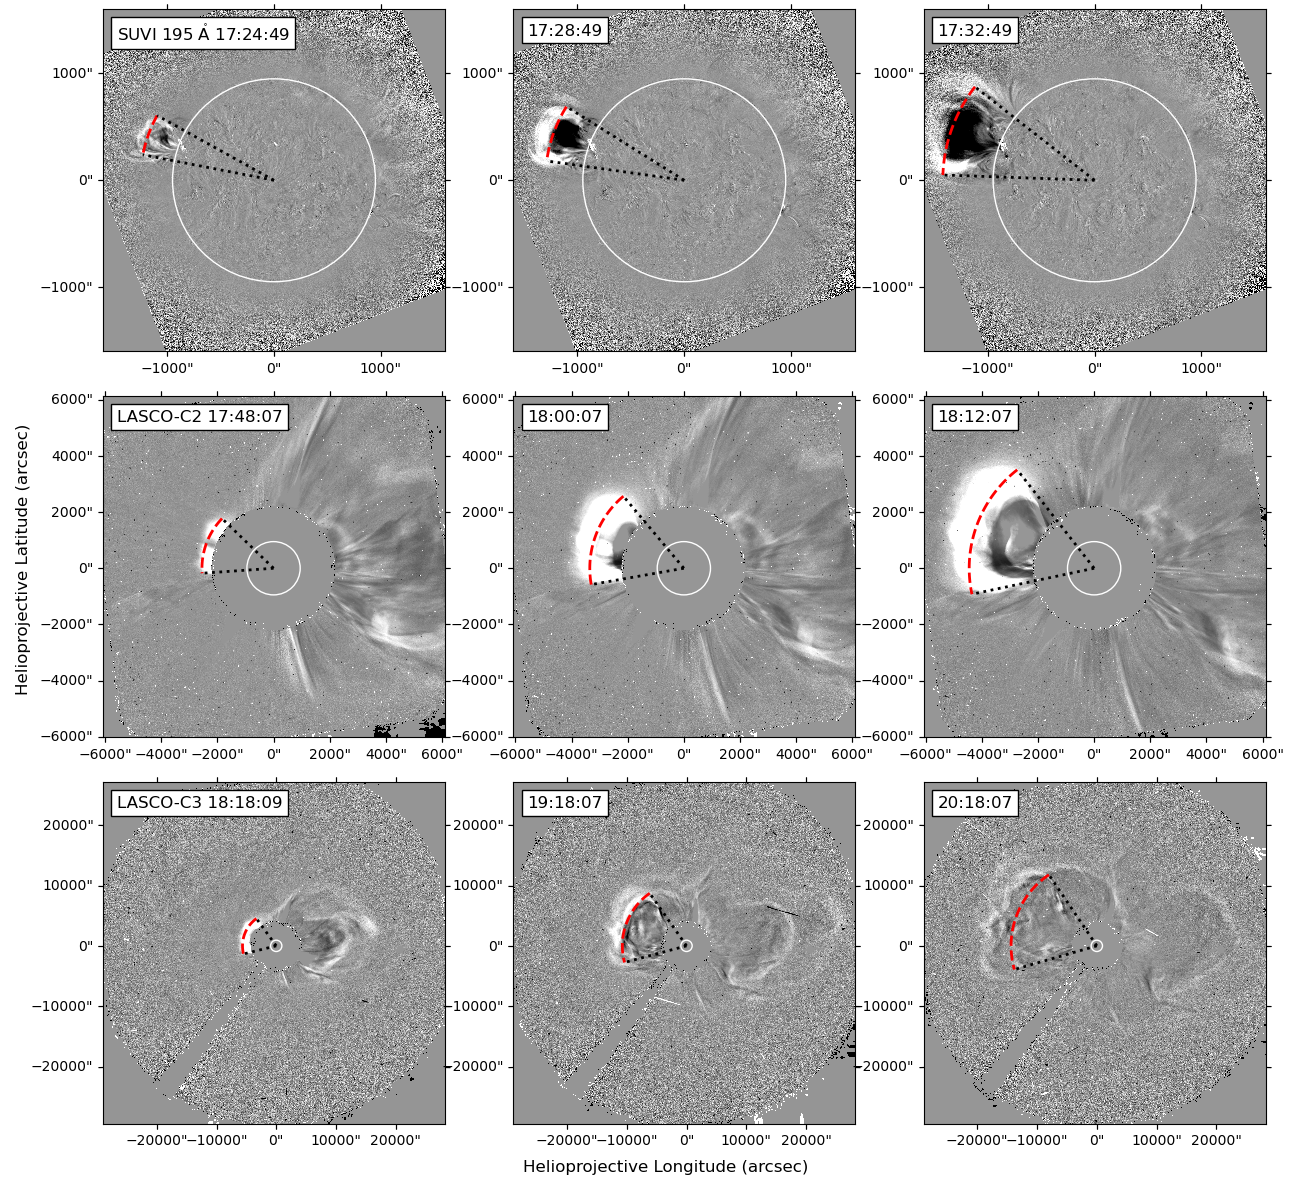

In [122]:
from astropy import constants as const

# Constants
central_angle = 160
offset = 350  # This offset is added to the central_line_length to get the radius of the arc

dates_suvi = []
dates_c2   = []
dates_c3   = []
distances_suvi = []
distances_c2   = []
distances_c3   = []
angular_widths_suvi = []
angular_widths_c2   = []
angular_widths_c3   = []

# Maps list
subset = [
    suvi_seq_runratio[5], suvi_seq_runratio[6], suvi_seq_runratio[7],
    m_seq_runratio_c2[1], m_seq_runratio_c2[2], m_seq_runratio_c2[3],
    m_seq_runratio_c3[2], m_seq_runratio_c3[7], m_seq_runratio_c3[12]
]

map_params = {
    suvi_seq_runratio[5]: {'angle_offset': 9, 'central_line_length': 900},
    suvi_seq_runratio[6]: {'angle_offset': 12, 'central_line_length': 950},
    suvi_seq_runratio[7]: {'angle_offset': 18, 'central_line_length': 1070},
    
    m_seq_runratio_c2[1]: {'angle_offset': 24, 'central_line_length': 2200},
    m_seq_runratio_c2[2]: {'angle_offset': 30, 'central_line_length': 3000},
    m_seq_runratio_c2[3]: {'angle_offset': 32, 'central_line_length': 4100},
    
    m_seq_runratio_c3[2]: {'angle_offset': 34, 'central_line_length': 5300},
    m_seq_runratio_c3[7]: {'angle_offset': 35, 'central_line_length': 10400},
    m_seq_runratio_c3[12]: {'angle_offset': 36, 'central_line_length': 14000},
}

fig = plt.figure(figsize=[15,15])
fig.supxlabel('Helioprojective Longitude (arcsec)', y=0.09)
fig.supylabel('Helioprojective Latitude (arcsec)', x=0.067)

for i, m in enumerate(subset):
    params = map_params[m]
    arc_coords, upper_end, lower_end, arc_length_Mm, angular_width = draw_arc(
        map_obj=m,
        angle_offset=params['angle_offset'],
        central_line_length=params['central_line_length']
    )

    ax = fig.add_subplot(3, 3, i+1, projection=m)
    m.plot(axes=ax)
    m.draw_limb()
    ax.grid(False)

    # Add label
    if i == 0:
        label = m.latex_name.split(' 2024')[0] + ' ' + m.latex_name.split('2024-05-14 ')[-1]
    elif i in [1, 2]:
        label = m.latex_name.split('2024-05-14 ')[-1]
    elif i == 3:
        label = m.latex_name.split(' Orange')[0] + ' ' + m.latex_name.split('2024-05-14 ')[-1]
    elif i in [4, 5]:
        label = m.latex_name.split('2024-05-14 ')[-1]
    elif i == 6:
        label = m.latex_name.split(' Clear')[0] + ' ' + m.latex_name.split('2024-05-14 ')[-1]
    elif i in [7, 8]:
        label = m.latex_name.split('2024-05-14 ')[-1]

    ax.text(0.04, 0.96, label, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))

    # Plot elements
    ax.plot_coord(arc_coords, color='red', linewidth=2, linestyle='dashed')
    ax.plot_coord(SkyCoord([SkyCoord(0 * u.arcsec, 0 * u.arcsec, frame=m.coordinate_frame), upper_end]),
                  color='black', linewidth=2, linestyle='dotted')
    ax.plot_coord(SkyCoord([SkyCoord(0 * u.arcsec, 0 * u.arcsec, frame=m.coordinate_frame), lower_end]),
                  color='black', linewidth=2, linestyle='dotted')
    
    # if 'instrume' in m.meta:
    #     if 'SUVI' in m.meta['instrume']:
    #         dates_suvi.append(m.date.datetime)
    #         distances_suvi.append(arc_length_Mm)
    #         angular_widths_suvi.append(angular_width)
    
    # elif 'detector' in m.meta:
    #     if 'C2' in m.meta['detector']:
    #         dates_c2.append(m.date.datetime)
    #         distances_c2.append(arc_length_Mm)
    #         angular_widths_c2.append(angular_width)
    
    #     elif 'C3' in m.meta['detector']:
    #         dates_c3.append(m.date.datetime)
    #         distances_c3.append(arc_length_Mm)
    #         angular_widths_c3.append(angular_width)

    if i in [0,1,2]:
        dates_suvi.append(m.date.datetime)
        distances_suvi.append(arc_length_Mm)
        angular_widths_suvi.append(angular_width)
    
    elif i in [3,4,5]:
        dates_c2.append(m.date.datetime)
        distances_c2.append(arc_length_Mm)
        angular_widths_c2.append(angular_width)
    
    elif i in [6,7,8]:
        dates_c3.append(m.date.datetime)
        distances_c3.append(arc_length_Mm)
        angular_widths_c3.append(angular_width)
    
    # # Optional annotation
    # ax.text(0.03, 0.12,
    #         f'Arc: {arc_length_Mm:.0f} Mm\nWidth: {angular_width:.0f}$^\\circ$',
    #         transform=ax.transAxes,
    #         fontsize=10, verticalalignment='top',
    #         bbox=dict(facecolor='white', edgecolor='black'), zorder=20)

    ax.set_title('')
    ax.set_xlabel(' ')
    ax.set_ylabel(' ')
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)

fig.subplots_adjust(wspace=0.2, hspace=0.01)
# fig.savefig(f'{data_dir}/euv_runratio_panels.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [124]:
def calc_speed(df):
    """
    Calculate the CME expansion speed in km/s.
    """
    speeds        = []
    ds_km         = np.diff(df['length_Mm'])*u.Mm.to('km')
    time_diff_sec = [ t/np.timedelta64(1,'s') for t in np.diff(df['date']) ]
    vexp          = ds_km / time_diff_sec
    speeds.append(vexp)
    return speeds

In [125]:
df_suvi = pd.DataFrame({'date': dates_suvi, 'length_Mm': distances_suvi, 'AW': angular_widths_suvi})
df_c2   = pd.DataFrame({'date': dates_c2, 'length_Mm': distances_c2, 'AW': angular_widths_c2})
df_c3   = pd.DataFrame({'date': dates_c3, 'length_Mm': distances_c3, 'AW': angular_widths_c3})

In [126]:
# Add expansion speed to the DataFrame (NaN for the first row)
expansion_speeds_suvi = calc_speed(df_suvi)
expansion_speeds_c2   = calc_speed(df_c2)
expansion_speeds_c3   = calc_speed(df_c3)

# df_suvi['expansion_speed_km_s'] = [None] + expansion_speeds_suvi
# df_c2['expansion_speed_km_s']   = [None] + expansion_speeds_c2
# df_c3['expansion_speed_km_s']   = [None] + expansion_speeds_c3

df_suvi['expansion_speed_km_s'] = np.insert(expansion_speeds_suvi, 0, None)
df_c2['expansion_speed_km_s']   = np.insert(expansion_speeds_c2, 0, None)
df_c3['expansion_speed_km_s']   = np.insert(expansion_speeds_c3, 0, None)

In [127]:
df_c2

date    length_Mm  AW  expansion_speed_km_s
0 2024-05-14 17:48:07.566  1566.114103  48                   NaN
1 2024-05-14 18:00:07.457  2571.809481  60           1397.010629
2 2024-05-14 18:12:07.848  3644.042842  64           1488.404714

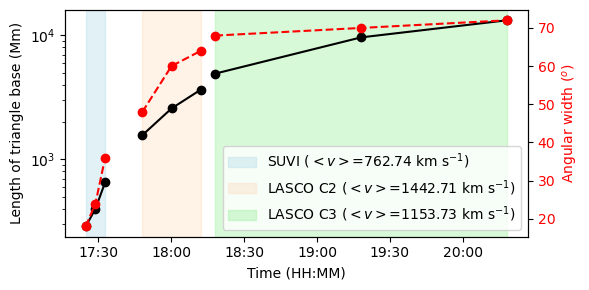

In [129]:
fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)

# Plot length in black
ax.plot(df_suvi['date'], df_suvi['length_Mm'], 'o-', color='k')
ax.plot(df_c2['date'], df_c2['length_Mm'], 'o-', color='k')
ax.plot(df_c3['date'], df_c3['length_Mm'], 'o-', color='k')
ax.set_ylabel('Length of triangle base (Mm)')
ax.set_xlabel('Time (HH:MM)')
ax.set_yscale('log')

# Make twin y-axis
ax2 = ax.twinx()
ax2.tick_params(axis='y', labelcolor='r')

# Plot AW in red dashed lines
ax2.plot(df_suvi['date'], df_suvi['AW'], 'o--', color='r')
ax2.plot(df_c2['date'], df_c2['AW'], 'o--', color='r')
ax2.plot(df_c3['date'], df_c3['AW'], 'o--', color='r')
ax2.set_ylabel(r'Angular width ($^o$)', color='r')

# Add vertical shading for each instrument
color_intensity = 0.35
ax.axvspan(df_suvi['date'].min(), df_suvi['date'].max(), color='#ADD8E6', alpha=color_intensity, label=rf'SUVI ($<v>$={np.nanmean(df_suvi["expansion_speed_km_s"]):.2f} km s$^{{-1}}$)')
ax.axvspan(df_c2['date'].min(), df_c2['date'].max(), color='#FFDAB9', alpha=color_intensity, label=rf'LASCO C2 ($<v>$={np.nanmean(df_c2["expansion_speed_km_s"]):.2f} km s$^{{-1}}$)')
ax.axvspan(df_c3['date'].min(), df_c3['date'].max(), color='#90EE90', alpha=color_intensity, label=rf'LASCO C3 ($<v>$={np.nanmean(df_c3["expansion_speed_km_s"]):.2f} km s$^{{-1}}$)')

ax.legend(loc='lower right')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig.tight_layout()
fig.savefig(f'{data_dir}/cme_expansion_speed.pdf', format='pdf', bbox_inches='tight')
plt.show()